     calories  protein  carbohydrate  sugar    fat  sodium  category_encoded  \
0         107     1.35         24.30  21.50   0.11    22.0                 1   
1         118     0.78         27.18  18.47   0.15     4.0                 1   
2         101     1.55         21.73  19.17   0.42    26.0                 1   
3          77     0.97         17.92   0.00   0.14    14.0                 1   
4          37     0.81          8.07   8.15   0.07     4.0                 1   
..        ...      ...           ...    ...    ...     ...               ...   
255       439    17.00         68.00   2.00  11.00   720.0                 3   
256        77     8.50          8.90   3.00   1.10  1419.0                 3   
257       527    44.00          4.90   2.60  42.40   689.0                 3   
258       183     2.50         38.00  15.00   2.30   220.0                 0   
259       237     1.20         53.30   8.40   1.80     0.6                 0   

     sugar_to_carb_ratio  fat_to_calori

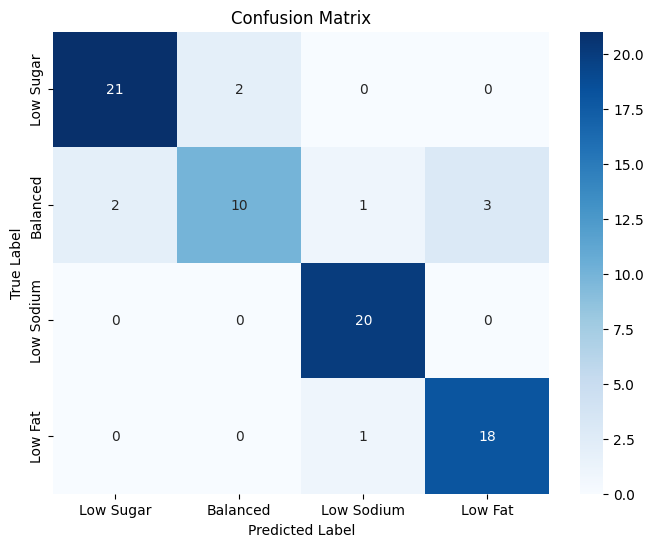

In [2]:
# --- นำเข้าคลังที่จำเป็น ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# --- โหลดและเตรียมข้อมูล ---
df = pd.read_csv('food_menu.csv')

class_counts = df['food_type'].value_counts()
max_count = class_counts.max()
df_balanced = pd.DataFrame()

for food_class, count in class_counts.items():
    class_df = df[df['food_type'] == food_class]
    if count < max_count:
        repeat_factor = int(np.ceil(max_count / count))
        class_df_duplicated = pd.concat([class_df] * repeat_factor, ignore_index=True)
        class_df_balanced = class_df_duplicated.sample(n=max_count, random_state=42)
    else:
        class_df_balanced = class_df
    df_balanced = pd.concat([df_balanced, class_df_balanced], ignore_index=True)

df = df_balanced

category_encoder = LabelEncoder()
df['category_encoded'] = category_encoder.fit_transform(df['category'])

df['sugar_to_carb_ratio'] = df['sugar'] / (df['carbohydrate'] + 1e-8)
df['fat_to_calorie_ratio'] = df['fat'] / (df['calories'] + 1e-8)

X = df[['calories', 'protein', 'carbohydrate', 'sugar', 'fat', 'sodium',
        'category_encoded', 'sugar_to_carb_ratio', 'fat_to_calorie_ratio']]
y = df['food_type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# --- สร้างและประเมินโมเดล RandomForest ---
model = RandomForestClassifier(n_estimators=500, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(X)

print(f"RandomForest Accuracy: {acc:.4f}")
print("Classification Report:")
print(report)

# --- สร้างและแสดง Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

class_labels_en = ['Low Sugar', 'Balanced', 'Low Sodium', 'Low Fat']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels_en, yticklabels=class_labels_en)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()





In [3]:
import joblib

# บันทึก LabelEncoder ของ category (feature)
category_encoder = LabelEncoder()
df['category_encoded'] = category_encoder.fit_transform(df['category'])

# บันทึกอ็อบเจ็กต์ทั้งหมด
joblib.dump(model, 'random_forest_model.pkl')                # โมเดลหลัก
joblib.dump(le, 'label_encoder.pkl')                         # LabelEncoder สำหรับ target (food_type)
joblib.dump(imputer, 'imputer.pkl')                          # ตัวจัดการ missing
joblib.dump(scaler, 'scaler.pkl')                            # ตัวปรับ scale
joblib.dump(category_encoder, 'category_encoder.pkl')        # LabelEncoder สำหรับ category




['category_encoder.pkl']